<a href="https://colab.research.google.com/github/OptimalDecisions/sports-analytics-foundations/blob/main/data-visualization/Data_Visualization_3_0_Overview.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  ## Data Visualization



  # Visualization Overview

  <img src = "../img/sa_logo.png" width="100" align="left">

  Ram Narasimhan

  <br><br><br>

  << [3.0 Merging Dataframes](Pandas_Intermediate_2_9_Merging_DataFrames.ipynb) | [3.1](Pandas_Intermediate_2_10_GroupBy.ipynb)  >>




Concepts covered in this notebook.

1. Split-Apply-Combine (the concept)
2. How to Create Groups in Pandas
3. Groupby and then calculatng aggregations
4. Grouping by multiple columns
5. Flattening Hierarchical Indices

In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
url = "https://datacrayon.com/datasets/athlete_events_known_age.csv"
df = pd.read_csv(url)

In [41]:
sports_to_keep = ['Basketball', 'Judo', 'Speed Skating', 'Cross Country Skiing',
          'Athletics', 'Ice Hockey', 'Badminton', 'Sailing',
          'Gymnastics', 'Alpine Skiing', 'Archery',
          'Volleyball', 'Cycling']

df = df[df['Sport'].isin(sports_to_keep)]

## 1. Exploratory vs Explanatory Plots



### 1.1 Exploratory Plots

Exploratory plots are visualizations we create during the initial phases. Our goal is mainly to gain insights into the underlying patterns in our data.

- These plots are primarily meant for the data analyst or scientist to understand the data's structures. Our goal is to identify areas with the potential for further investigation.

- Exploratory plots are often quick and less polished,

- Personally, I use Pandas plotting when I want a quick and easy way to visualize data directly from a DataFrame. I find that it is great for simple plots and quick insights.

- Exploratory visualisations are our “private talk” with data when trying to find insights.

 - For such visualisations, you might pay less attention to design and details, i.e., omit titles or not use consistent colour schemes across charts, since these visualisations are only for your eyes.

- We usually start with a bunch of quick chart prototypes. However, we still need to think about the most suitable chart type for whatever we are trying to discover. Proper visualisation can help you find insights, while the wrong one can hide the clues. So, we should choose wisely.



### 1.2 Explanatory Plots

Explanatory visualisations are intended to convey information to our audience. In this case, we need to focus more on details and the context to achieve our goal.

- These are refined visualizations designed to effectively communicate findings, to tell a specific story to a broader audience.

- These plots are created after thorough data exploration and are intended for presentations or publications.

- The emphasis is on clarity, precision, and the narration.

- Explanatory plots often include thoughtful annotations, appropriate labels, and may undergo extensive customization for visual appeal.

**Rule of Thumb**
- For exploration - Use Pandas
- For explanation - Use Matplotlip and Seaborn


Matplotlib and Seaborn, with their customization options, are frequently employed for crafting explanatory plots, especially when the goal is to convey complex information in a visually compelling




## 2. Plotting Libraries: Matplotlib, Seaborn and Pandas




### 2.1 Pandas Plotting

Let's start with the simplest and the most straight-forward plotting option we have.

Pandas is already integrated with Matplotlib, and is well-suited for quick and simple exploratory data analysis (EDA) directly within the Pandas environment.

- Seamless Integration: Pandas plotting provides a simple interface for creating basic plots directly from Pandas DataFrames.
- Quick Exploration: Allows for quick visual exploration of data with just 2-3 lines of code.

- Intuitive Syntax: The plotting functions mimic the syntax of Matplotlib, making it easy for us to create basic visualizations.



### 2.2 Matplotlib

`Matplotlib` is Python's fundamental Plotting Library.
Uses: If we want to create a variety of static plots for data exploration and presentation, and make them to be of "production quality" then this is the library of choice.


- Matplotlib has a very wide range of plotting options.
- Customization: Offers fine-grained control over plot elements, allowing users to customize every aspect of the plot. (Note that this can also be daunting to new users of the library.)



### 2.3 Seaborn: Statistical Data Visualization

Seaborn is a library for making statistical graphics in Python. It builds on top of matplotlib and integrates closely with pandas data structures. Seaborn helps us explore and understand our data.

One area for which I gravitate to Seaborn --  when exploring relationships between multiple variables.

**Strengths**

- Statistical Plots: Seaborn is built on top of Matplotlib and provides a high-level interface. (This means that we can use commands that take care of all the "low-level" tasks for us, making it much faster to generate nice plots.)

- Pleasing Defaults: Seaborn comes with aesthetically pleasing color palettes and themes, making it easy to create visually appealing plots. (In Matplotlib, we often need extensive customization.)

- Simplifies Complex Plots: Seaborn simplifies the creation of complex plots like heatmaps, pair plots, and categorical plots. (We will see a few examples of this in the notebooks that follow.)


## 3. Basic and Common Visualization Types

### 3.1. Line Plot:
Description: Line plots are used to visualize the trend or pattern in a continuous dataset over a specific range. They are particularly useful for showing how a variable changes over time or across different categories.
Libraries: Matplotlib and Pandas plotting.



In [42]:

mean_wts = df.groupby('Sport')['Weight'].mean().reset_index()
mean_wts

,Sport,Weight
0,Alpine Skiing,72.082648
1,Archery,70.014870
2,Athletics,69.273738
3,Badminton,68.171439
4,Basketball,85.801799
5,Cross Country Skiing,65.880462
6,Cycling,70.111768
7,Gymnastics,56.885118
8,Ice Hockey,80.837737
9,Judo,78.820113


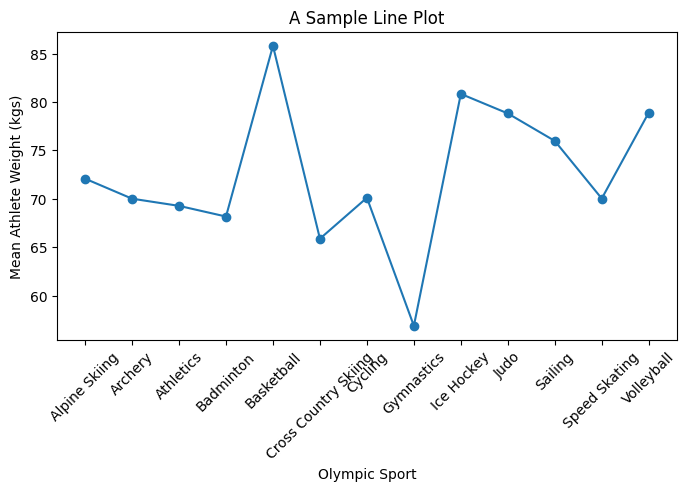

In [43]:

# Line Plot
plt.figure(figsize=(8, 4))  # Create a new figure with a specific size
plt.plot(mean_wts['Sport'], mean_wts['Weight'], marker='o')  # Plotting a line with markers
plt.title('A Sample Line Plot')  # Set the title of the plot
plt.xlabel('Olympic Sport')  # Label the x-axis, a column in our df
plt.ylabel('Mean Athlete Weight (kgs)')  # Label the y-axis, another column
plt.xticks(rotation=45)
plt.show()  # Display the plot



### 3.2. Scatter Plot:
Description: Scatter plots display individual data points on a two-dimensional plane, revealing the relationship between two continuous variables. They are excellent for identifying patterns, clusters, or outliers in data.
Libraries: Matplotlib and Seaborn.


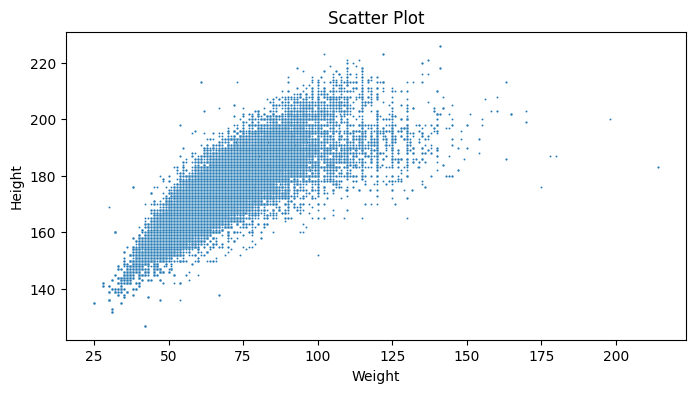

In [44]:
# Scatter Plot
plt.figure(figsize=(8, 4))
sns.scatterplot(x='Weight', y='Height', data=df, s=2)  # Creating a scatter plot using Seaborn
plt.title('Scatter Plot')
plt.show()



### 3.3. Bar Plot:
Description: Bar plots represent data as rectangular bars with lengths proportional to the values they represent. They are effective for comparing discrete categories and are commonly used to show the distribution or comparison of categorical data.
Libraries: Matplotlib and Pandas plotting.



In [45]:
mean_values = df.groupby('Sport')['Height'].mean().reset_index()
mean_values

,Sport,Height
0,Alpine Skiing,173.488237
1,Archery,173.202160
2,Athletics,176.275961
3,Badminton,174.178803
4,Basketball,190.926905
5,Cross Country Skiing,173.252775
6,Cycling,176.139397
7,Gymnastics,162.919211
8,Ice Hockey,178.901323
9,Judo,174.191181


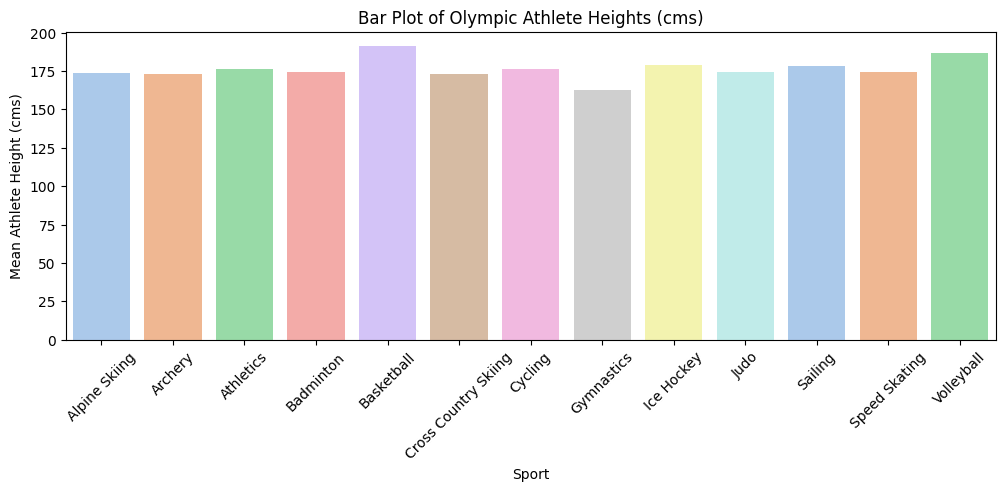

In [46]:
# Bar Plot
plt.figure(figsize=(12, 4))
sns.barplot(x='Sport', y='Height', data=mean_values, errorbar=None, palette='pastel')
plt.title('Bar Plot of Olympic Athlete Heights (cms)')
plt.xlabel('Sport')
plt.xticks(rotation=45)
plt.ylabel('Mean Athlete Height (cms)')
plt.show()



### 3.4. Histogram
Description: Histograms provide a visual representation of the distribution of a single variable by dividing the data into bins and displaying the frequency or probability of data points falling into each bin. They are useful for understanding the data's underlying structure.
Libraries: Matplotlib and Pandas plotting.



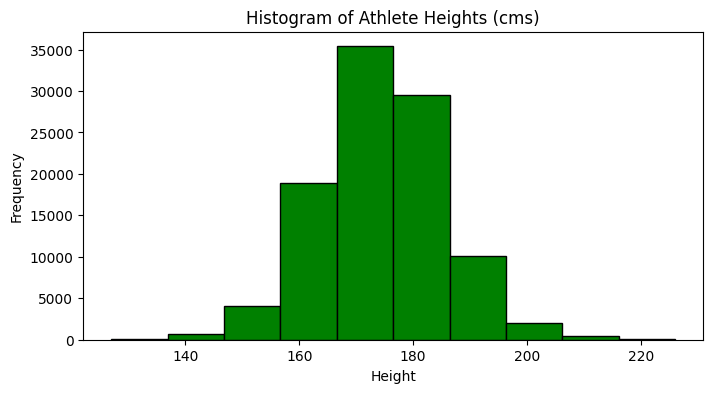

In [47]:
# Histogram
plt.figure(figsize=(8, 4))
plt.hist(df['Height'], bins=10, color='green', edgecolor='black')
plt.title('Histogram of Athlete Heights (cms)')
plt.xlabel('Height')
plt.ylabel('Frequency')
plt.show()



### 3.5. Box Plot (Box-and-Whisker Plot):
Description: Box plots are used to depict the distribution of a dataset and highlight measures such as the median, quartiles, and potential outliers. They are particularly effective for comparing distributions across different groups.
Libraries: Matplotlib and Seaborn.

In [48]:
df.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

<ipython-input-49-a31f8a5f9ca4>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  x_order = df.groupby('Sport').median().sort_values('Height', ascending=False).index


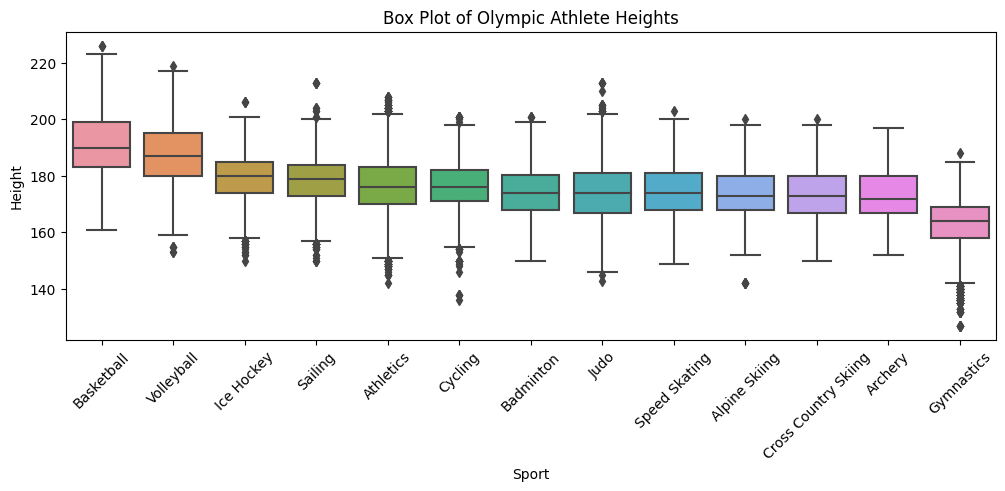

In [49]:
# Box Plot
plt.figure(figsize=(12, 4))
x_order = df.groupby('Sport').median().sort_values('Height', ascending=False).index
sns.boxplot(x='Sport', y='Height', order=x_order, data=df)
plt.title('Box Plot of Olympic Athlete Heights')
plt.xlabel('Sport')
plt.xticks(rotation=45)
plt.ylabel('Height')
plt.show()
